In [5]:
import AmorphSim as am

In [6]:
cube = am.SimulationCube(dimensions=(20,20,20)) # in nm

In [7]:
print(cube)

<Cube of 0 clusters [20 x 20 x 20nm]>


In [8]:
cube.add_random_clusters(num_clusters=1000) # adding 1000 randomly oriented clusters
print(cube)

<Cube of 1000 clusters [20 x 20 x 20nm]>


here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


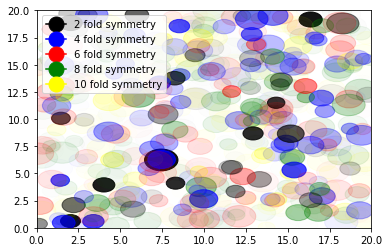

In [10]:
cube.plot_symmetries()

In [11]:
no_noise = cube.get_4d_stem(convolve=True)
small_noise = cube.get_4d_stem(noise=100, convolve=True)
med_noise = cube.get_4d_stem(noise=200, convolve=True)
large_noise = cube.get_4d_stem(noise=500, convolve=True)

In [12]:
import hyperspy.api as hs
import matplotlib.pyplot as plt

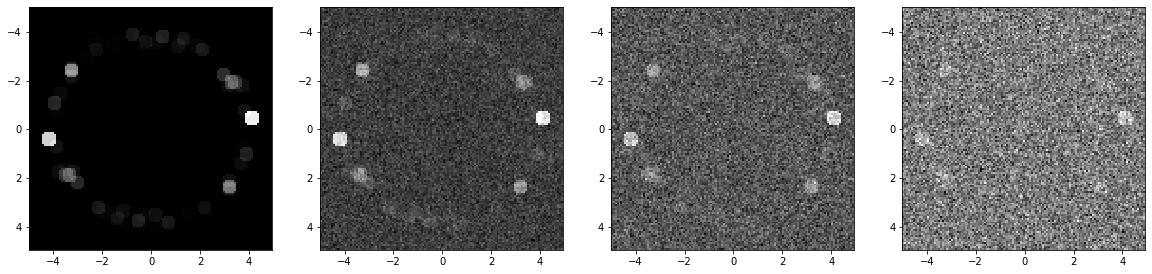

In [13]:
f = plt.figure(figsize=(20,10))
hs.plot.plot_images([no_noise.inav[10,10],
                      small_noise.inav[10,10],
                      med_noise.inav[10,10],
                      large_noise.inav[10,10]],per_row=4, fig=f, colorbar=None)
plt.show()

In [14]:
no_noise.set_signal_type("DiffractionSignal")
small_noise.set_signal_type("DiffractionSignal")
med_noise.set_signal_type("DiffractionSignal")
large_noise.set_signal_type("DiffractionSignal")

In [15]:
no_noise.metadata.Signal.Ellipticity.center= [64,64]
no_noise.metadata.Signal.Ellipticity.angle = None
no_noise.metadata.Signal.Ellipticity.lengths = None
no_noise.metadata.Signal.Ellipticity.calibrated = True
no_noise_polar = no_noise.calculate_polar_spectrum(phase_width=180)

In [16]:
corr = no_noise_polar.autocorrelation()

In [17]:
p = corr.get_power_spectrum().isig[0:12,:]

<IPython.core.display.Javascript object>


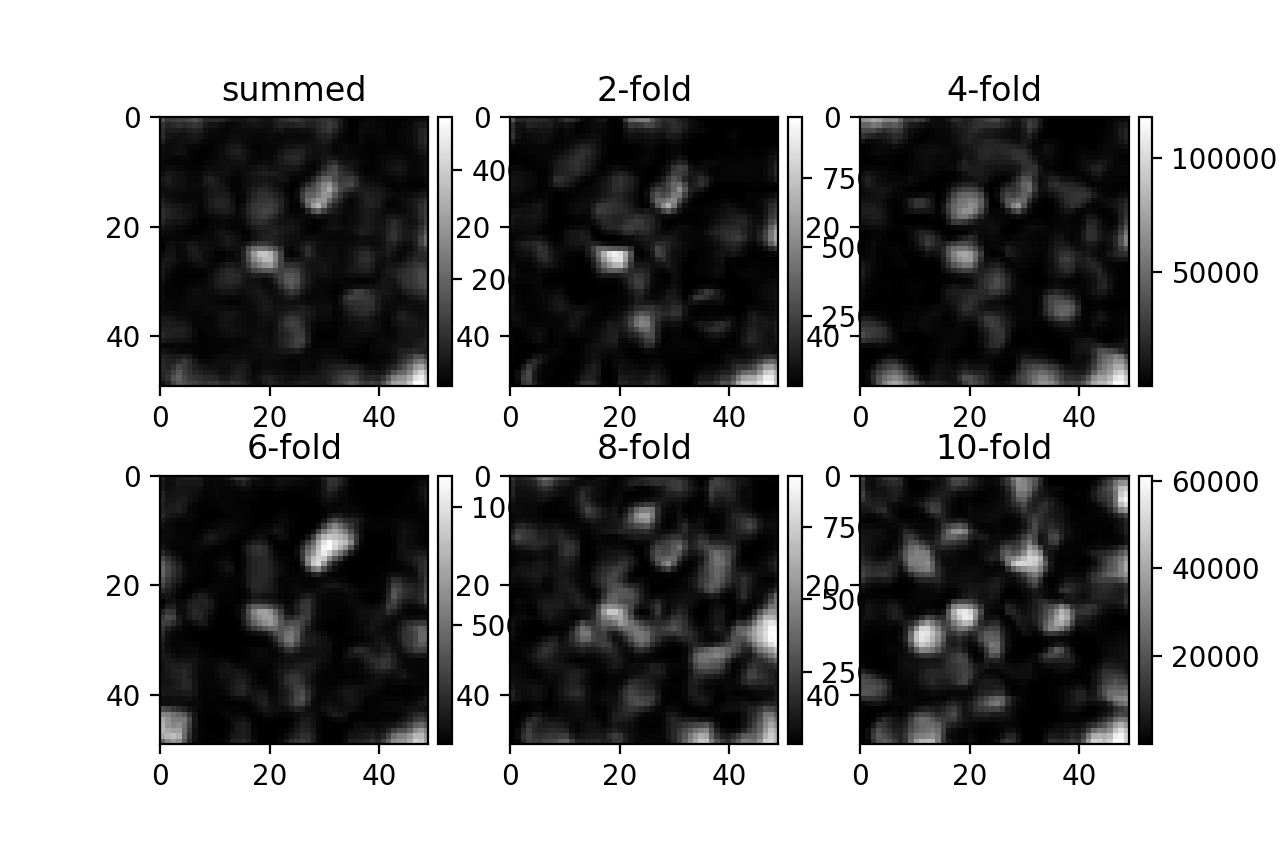

In [30]:
%matplotlib notebook
p.plot_symmetries()

In [19]:
small_noise.metadata.Signal.Ellipticity.center= [64,64]
small_noise.metadata.Signal.Ellipticity.angle = None
small_noise.metadata.Signal.Ellipticity.lengths = None
small_noise.metadata.Signal.Ellipticity.calibrated = True
small_noise_polar = no_noise.calculate_polar_spectrum(phase_width=180)

In [31]:
corr = small_noise_polar.autocorrelation()

In [32]:
p = corr.get_power_spectrum().isig[0:12,:]

<IPython.core.display.Javascript object>


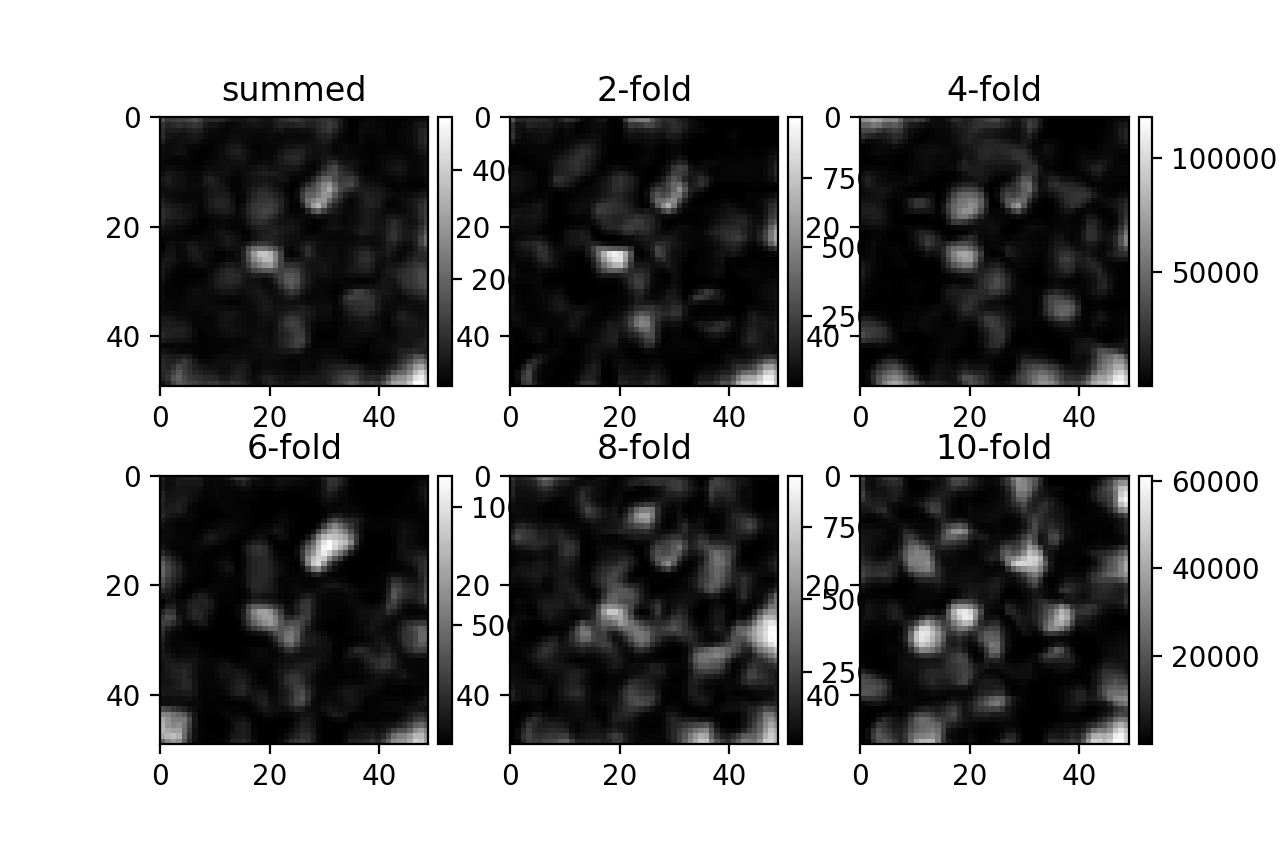

In [33]:
p.plot_symmetries()